In [1]:
import os
os.getcwd()
# set Code_and_Data as the working directory
os.chdir('/home/sihags/Downloads/VNN_FTDC_exps/Code_and_Data/')

import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

import pandas as pd 
import Modules.VNN_archit as VNNarchit
import Utils.graphML as gml

import pandas as pd
import numpy as np
import torch

import Utils.vnn_demo_utils as VNN_Transfer



/home/sihags/anaconda3/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.0, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(
/home/sihags/anaconda3/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [2]:
# reg_profile_oasis: Function to evaluate 
# (i) reg_profile: the regional profile corresponding to robsutness of the elevated regional residuals in the AD+ group with respect 
#                   to HC group in OASIS-3 
# (ii)corr_eig_AD: the correlations between the regional residuals and eigenvectors of the anatomical covariance matrix for AD+ group
# Input: The sdataset on which the selected VNNs were trained ('148' for OASIS-3, '100' for FTDC100, '300' for FTDC300, '500' for FTDC500)

# Example: Generate regional profiles and correlation between eigenvectors and regional residuals for VNNs trained on OASIS-3
reg_profile, corr_eig_AD = VNN_Transfer.reg_profile_oasis('148')

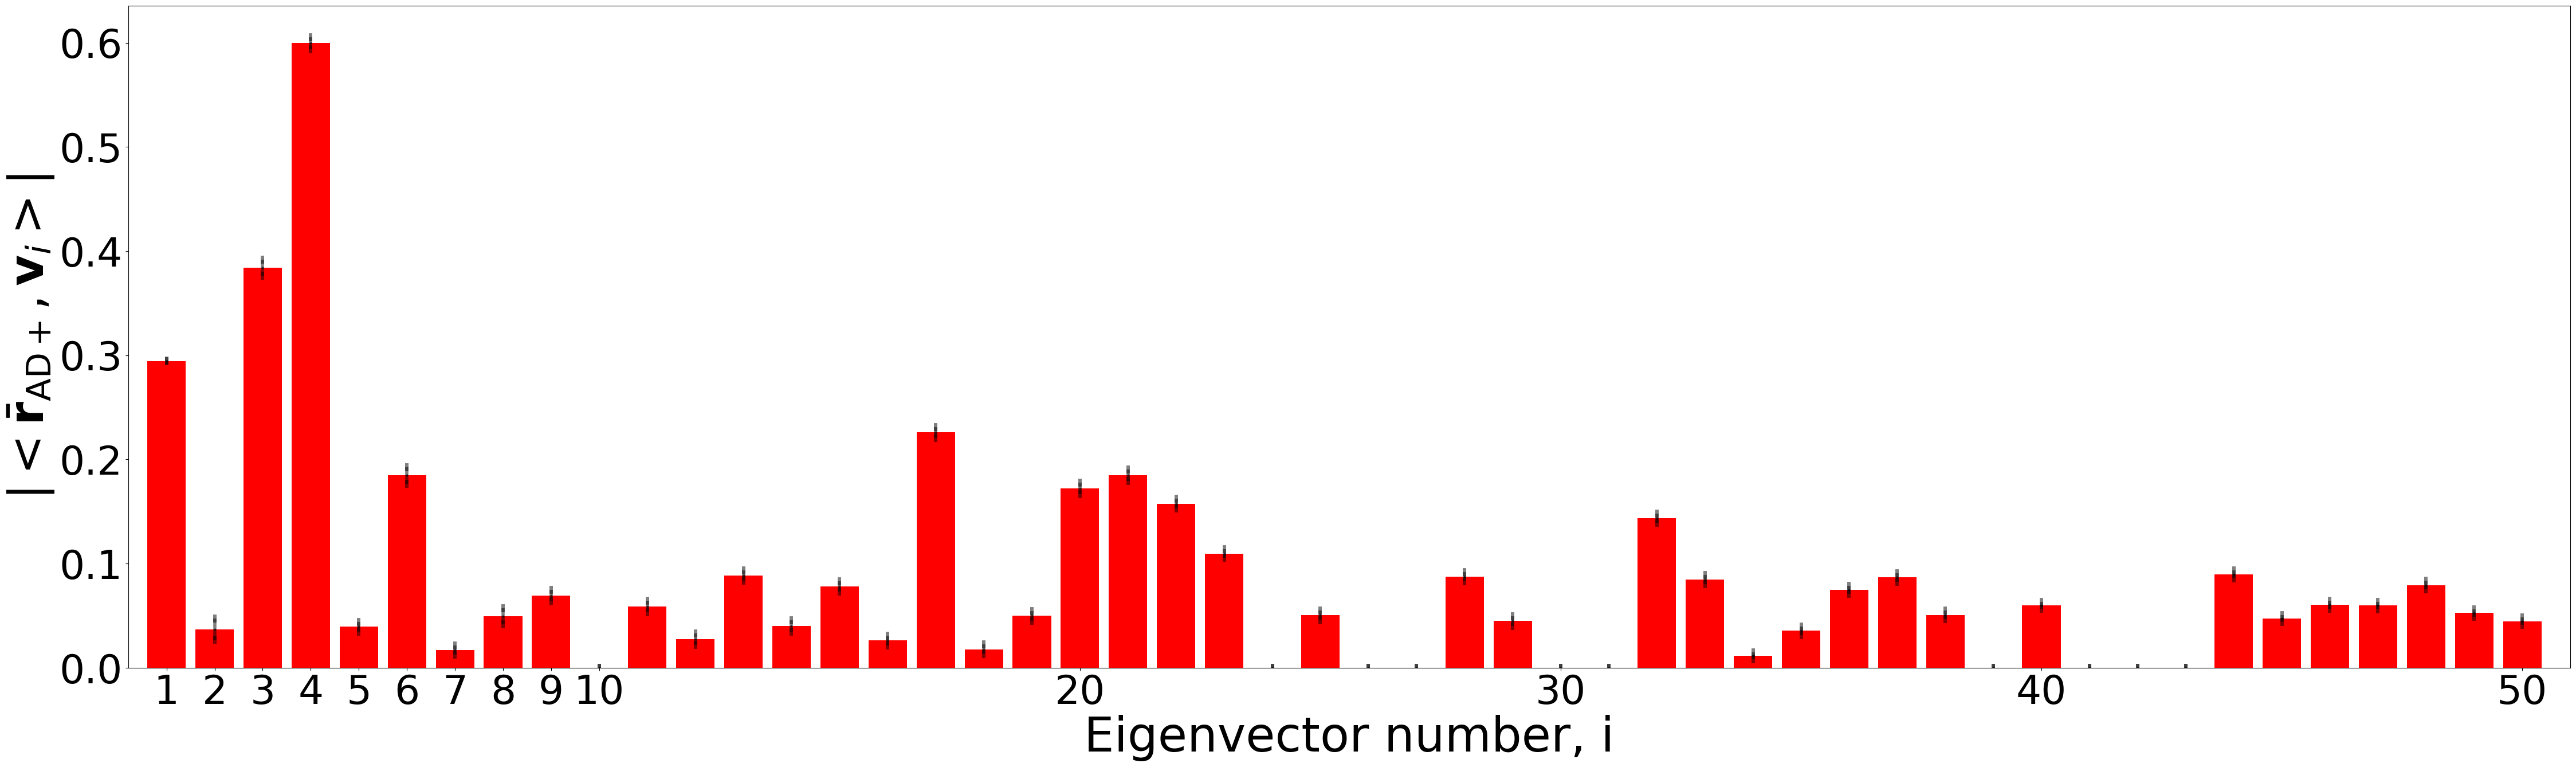

In [3]:
# Plot correlation between first 'n_eigs' number of eigenvectors and regional residuals for AD+ group
n_eigs = 50
plt.figure(figsize=(55,15))
plt.bar(range(1,n_eigs+1), corr_eig_AD[0:n_eigs,0], color='red')
xtck = [i for i in range(10)]
for i in range(10,n_eigs+1,10):
    xtck.append(i)

plt.xticks(xtck, fontsize=50)#30)
plt.yticks(fontsize=50)
plt.xlim(0.2,n_eigs+1)
plt.errorbar(range(1,n_eigs+1), corr_eig_AD[0:n_eigs,0], corr_eig_AD[0:n_eigs,1], fmt='.', color='black', elinewidth=4,capthick=10,errorevery=1, alpha=0.5, ms=4, capsize = 2)
plt.ylabel(r'$|<\bar{\bf r}_{\sf AD+}, {\bf v}_i>|$', fontsize=60)
plt.xlabel('Eigenvector number, i', fontsize=60)
plt.show()

In [4]:
# visualize_reg_profile_OASIS generates the annot files that will help visualize the regional profile for robustness of the elevated regional residuals in AD+ group
# for different brain regions 

VNN_Transfer.visualize_reg_profile_OASIS(reg_profile)

In [5]:
# Visualization of regional profiles using 'fsbrain' package in R
# Note: these visualizations may be slightly different from the ones in the manuscript since age and gender data were not included while generating reg_profile. 

import rpy2.robjects.packages as rpackages
from rpy2.robjects.packages import importr, data


utils = importr('utils')
base = importr('base')
fsbrain = importr('fsbrain')
subjects_dir = "Parcellations/"

fsbrain.vis_subject_annot(subjects_dir, 'fsaverage5', 'OASIS_148VNN', 'both', views='t4',surface='inflated')

lh,[RTYPES.VECSXP]
rh,[RTYPES.VECSXP]
